# Unsupervised learning - PCA

In [1]:
%pylab
%matplotlib inline

%config InlineBackend.figure_format = 'retina'

import numpy as np

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


### PCA - Principal Component Analysis

At the beginning, we are going to implement the PCA's procedure by ourselves, getting the eigenvalues and the eigenvectors:

In [2]:
# Create a dataset, each column is a component
x = np.array([[0.9, 1],
              [2.4, 2.6],
              [1.2, 1.7],
              [0.5, 0.7],
              [0.3, 0.7],
              [1.8, 1.4],
              [0.5, 0.6],
              [0.3, 0.6],
              [2.5, 2.6],
              [1.3, 1.1]])

# Create a new dataset removing in each column its mean
y = np.array([x.T[0] - mean(x.T[0]),
              x.T[1] - mean(x.T[1])])

# Get the covariance matrix
c = np.cov(y)

# Get the eigenvalues and eigenvectors:
eigenvalues, eigenvectors = np.linalg.eig(c)

# Print the results
print("The eigenvectors are:", eigenvectors.T[0], "and", eigenvectors.T[1])
print("The eigenvalues are:", eigenvalues)

The eigenvectors are: [ 0.73251454  0.68075138] and [-0.68075138  0.73251454]
The eigenvalues are: [ 1.25057433  0.03398123]


Let's get the explained variance ratio that each eigenvalue has, using the following formula (being $\lambda_i$ each eigenvalue and $m$ the amount of eigenvalues):

$$\frac{\lambda_i}{\sum^m_{j=1}{\lambda_{j}}}$$

In [3]:
for i in range(len(eigenvalues)) :
    print("Explained variance ratio of eigenvalue", i, "=", eigenvalues[i]/sum(eigenvalues))

Explained variance ratio of eigenvalue 0 = 0.973546316287
Explained variance ratio of eigenvalue 1 = 0.0264536837129


With this results, we can say that the first component represents the 97% of the total variance. Now, we are going to project data using the eigenvectors:

In [4]:
print("First component:", dot(y.T, eigenvectors.T[0]))
print("\nSecond component:", -dot(y.T, eigenvectors.T[1]))

First component: [-0.40200434  1.78596968  0.29427599 -0.89923557 -1.04573848  0.5295593
 -0.96731071 -1.11381362  1.85922114 -0.04092339]

Second component: [ 0.03595149 -0.1149447  -0.27258328 -0.0165947  -0.15274498  0.35562192
  0.05665675 -0.07949352 -0.04686956  0.23500059]


Once we have implemented the PCA's procedure, we are going to use the `scikit-learn` implementation: 

In [5]:
from sklearn.decomposition import PCA

In [6]:
# Create a dataset, each column is a component
x = np.array([[0.9, 1],
              [2.4, 2.6],
              [1.2, 1.7],
              [0.5, 0.7],
              [0.3, 0.7],
              [1.8, 1.4],
              [0.5, 0.6],
              [0.3, 0.6],
              [2.5, 2.6],
              [1.3, 1.1]])

# Create a PCA object
pca = PCA(n_components = 2) # n_components = maximum of components which we want to get

# Get the PCA
x_pca = pca.fit_transform(x) 

# Print explained variance ratio of each component:
for i in range(len(pca.explained_variance_ratio_)) :
    print("Explained variance ratio of eigenvalue", i, "=", pca.explained_variance_ratio_[i])
    
# Print the data projected:
print("\n", x_pca)

Explained variance ratio of eigenvalue 0 = 0.973546316287
Explained variance ratio of eigenvalue 1 = 0.0264536837129

 [[-0.40200434  0.03595149]
 [ 1.78596968 -0.1149447 ]
 [ 0.29427599 -0.27258328]
 [-0.89923557 -0.0165947 ]
 [-1.04573848 -0.15274498]
 [ 0.5295593   0.35562192]
 [-0.96731071  0.05665675]
 [-1.11381362 -0.07949352]
 [ 1.85922114 -0.04686956]
 [-0.04092339  0.23500059]]


These results are the same that ours, for that our PCA's procedure is correct.

### Using PCA with `iris` dataset

We are going to use PCA with `iris` dataset for using this procedure with datasets which have more of two dimensions:

In [7]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

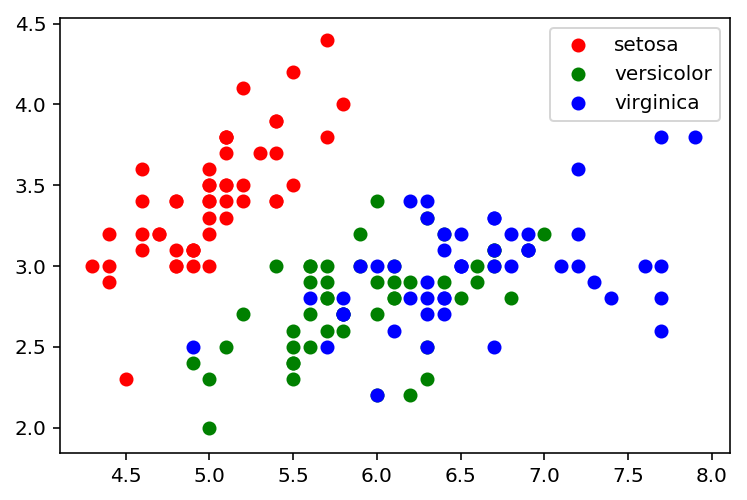

In [8]:
# Import dataset and display the two first features
data = load_iris()
iris_names = data.target_names
iris_target = data.target
iris_values = data.data

scatter(iris_values[iris_target == 0, 0], iris_values[iris_target == 0, 1], c='r')
scatter(iris_values[iris_target == 1, 0], iris_values[iris_target == 1, 1], c='g')
scatter(iris_values[iris_target == 2, 0], iris_values[iris_target == 2, 1], c='b')
legend(iris_names)

In [9]:
# Let's use PCA
pca = PCA(n_components = None) 
iris_pca = pca.fit_transform(iris_values)

# Print the explained variance ratio of each component:
for i in range(shape(iris_pca)[1]) :
    explained_var = sum(pca.explained_variance_ratio_[range(i + 1)])
    print("Explained variance with", i + 1, "components =", explained_var)

Explained variance with 1 components = 0.924616207174
Explained variance with 2 components = 0.977631775025
Explained variance with 3 components = 0.99481691455
Explained variance with 4 components = 1.0


As we can observe, the two first components explain the 97% of the total variance. The result of represent the two first components is:

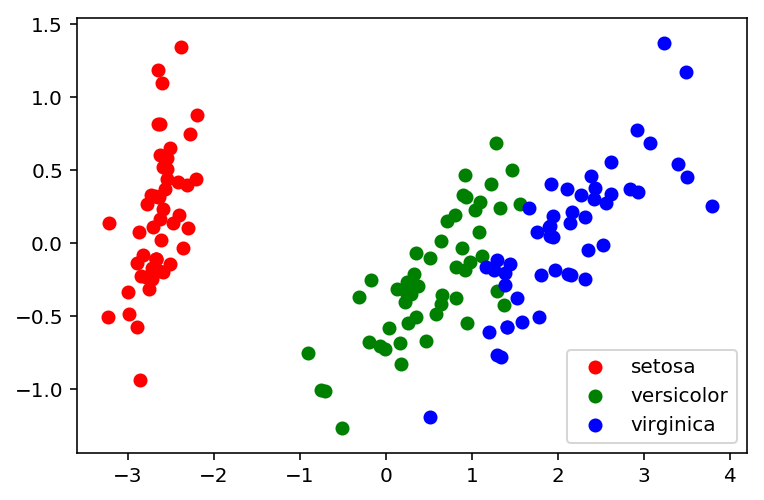

In [10]:
scatter(iris_pca[iris_target == 0, 0], iris_pca[iris_target == 0, 1], c='r')
scatter(iris_pca[iris_target == 1, 0], iris_pca[iris_target == 1, 1], c='g')
scatter(iris_pca[iris_target == 2, 0], iris_pca[iris_target == 2, 1], c='b')
legend(iris_names)